In [1]:
from astropy import units as u
import setigen as stg
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
%matplotlib inline
plt.ioff()

In [2]:
fchans=1024*u.pixel
tchans=20*u.pixel
df=2.7939677238464355*u.Hz
dt=18.253611008*u.s
fch1=6095.214842353016*u.MHz

start_index=200
drift_rate=2*u.Hz/u.s
snr=30
width=40*u.Hz
level=1

stop_index = int(((drift_rate*(tchans * dt)/df)+start_index*u.pixel)*1/u.pixel)

(218, 335, 3)


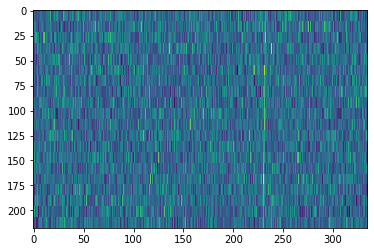

(218, 11, 3)


0 0.6925373134328359 0.5 0.03283582089552239 1


In [7]:
"""
 |      fchans : int, optional
 |          Number of frequency samples
 |      tchans: int, optional
 |          Number of time samples
 |      df : astropy.Quantity, optional
 |          Frequency resolution (e.g. in u.Hz)
 |      dt : astropy.Quantity, optional
 |          Time resolution (e.g. in u.s)
 |      fch1 : astropy.Quantity, optional
 |          Frequency of channel 1, as in filterbank file headers (e.g. in u.Hz).
 |          If ascending=True, fch1 is the minimum frequency; if ascending=False 
 |          (default), fch1 is the maximum frequency.
"""

fchans=1024*u.pixel
tchans=20*u.pixel
df=np.random.uniform(4,15)*u.Hz
dt=np.random.uniform(1,10)*u.s
fch1=6095.214842353016*u.MHz

start_index=np.random.randint(200,800)
drift_rate=np.random.uniform(0,8)*u.Hz/u.s
snr=np.random.uniform(10,30)
width=np.random.uniform(30,50)*u.Hz
level=1

stop_index = int(((drift_rate*(tchans * dt)/df)+start_index*u.pixel)*1/u.pixel)

frame = stg.Frame(fchans=fchans,
                  tchans=tchans,
                  df=df,
                  dt=dt,
                  fch1=fch1)
noise = frame.add_noise_from_obs()
signal = frame.add_signal(stg.constant_path(f_start=frame.get_frequency(index=start_index),
                                            drift_rate=drift_rate),
                          stg.constant_t_profile(level=frame.get_intensity(snr=snr)),
                          stg.gaussian_f_profile(width=width),
                          stg.constant_bp_profile(level=level))

fig = plt.figure(figsize=(6, 4))
# frame.bl_plot()
# plt.show()

data = plt.imshow(frame.data,aspect='auto',interpolation='none').make_image(renderer=None, unsampled=False)[0][:,:,:3]
ydim,xdim = data.shape[:2]
sigx1 = int(start_index/1000*xdim)-int(xdim*0.025)
sigx2 = int(stop_index/1000*xdim)+int(xdim*0.005)

# plt.xticks(np.linspace(0,data.shape[1]-1,11),np.linspace(0,1000,11))
# plt.colorbar()
plt.imshow(data)
print(data.shape)
plt.show()

plt.imshow(data[:,sigx1:sigx2])
print(data[:,sigx1:sigx2].shape)
plt.axis('off')
plt.show()

xc = int(sigx1+((sigx2-sigx1)/2))/xdim
yc = 0.5
w  = (sigx2-sigx1)/xdim
h  = 1

print(f"0 {xc} {yc} {w} {h}")

  0%|          | 0/10 [00:00<?, ?it/s]

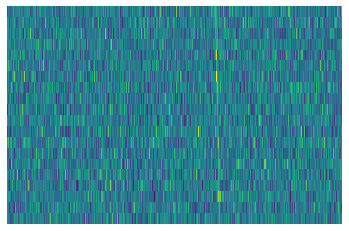

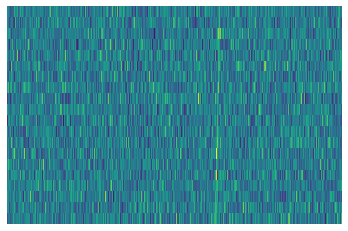

 10%|█         | 1/10 [00:00<00:01,  5.21it/s]

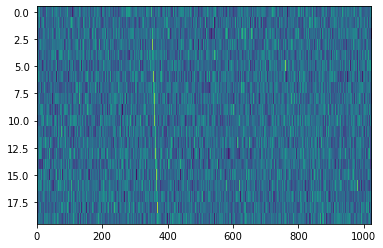

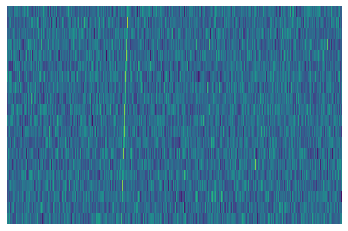

 20%|██        | 2/10 [00:00<00:01,  4.32it/s]

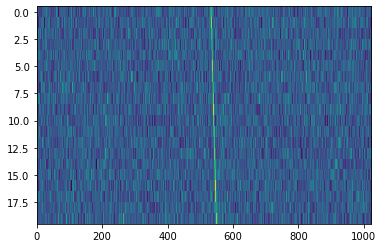

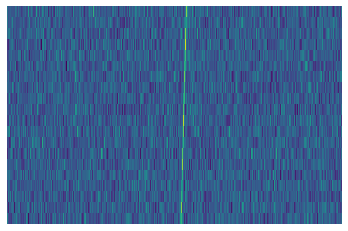

 30%|███       | 3/10 [00:00<00:01,  3.60it/s]

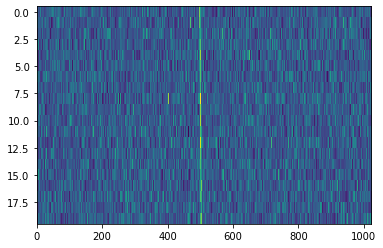

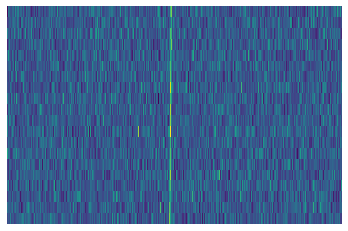

 40%|████      | 4/10 [00:01<00:01,  3.95it/s]

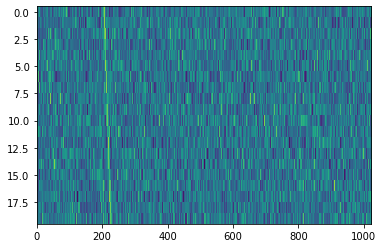

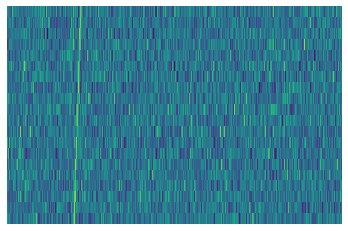

 50%|█████     | 5/10 [00:01<00:01,  4.20it/s]

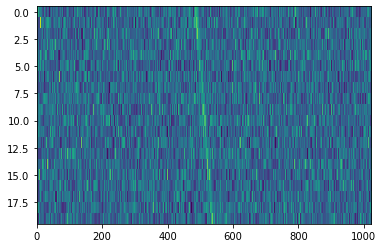

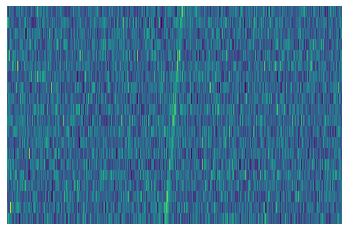

 60%|██████    | 6/10 [00:01<00:00,  4.40it/s]

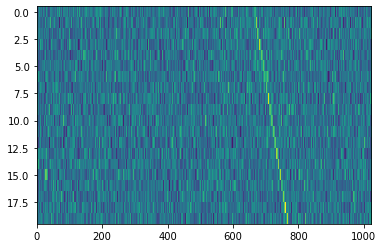

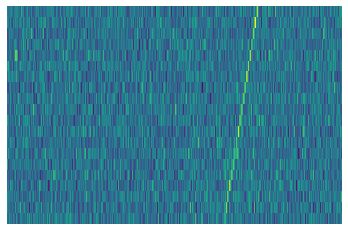

 70%|███████   | 7/10 [00:01<00:00,  4.53it/s]

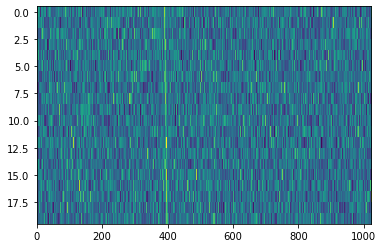

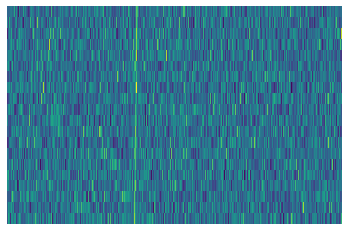

 80%|████████  | 8/10 [00:01<00:00,  4.58it/s]

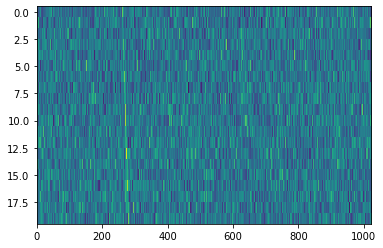

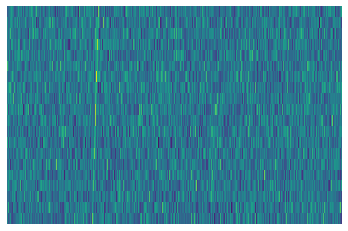

 90%|█████████ | 9/10 [00:02<00:00,  4.56it/s]

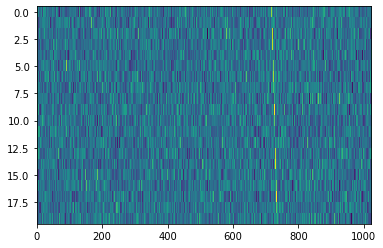

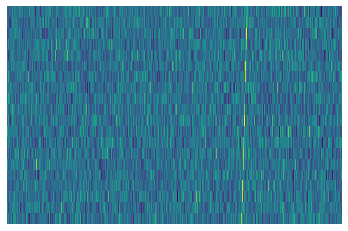

100%|██████████| 10/10 [00:02<00:00,  4.40it/s]


In [5]:
for i in tqdm(range(10)):
    
    """
     |      fchans : int, optional
     |          Number of frequency samples
     |      tchans: int, optional
     |          Number of time samples
     |      df : astropy.Quantity, optional
     |          Frequency resolution (e.g. in u.Hz)
     |      dt : astropy.Quantity, optional
     |          Time resolution (e.g. in u.s)
     |      fch1 : astropy.Quantity, optional
     |          Frequency of channel 1, as in filterbank file headers (e.g. in u.Hz).
     |          If ascending=True, fch1 is the minimum frequency; if ascending=False 
     |          (default), fch1 is the maximum frequency.
    """

    
    fchans=1024*u.pixel
    tchans=20*u.pixel
    df=np.random.uniform(4,15)*u.Hz
    dt=np.random.uniform(1,10)*u.s
    fch1=6095.214842353016*u.MHz

    start_index=np.random.randint(200,800)
    drift_rate=np.random.uniform(0,5)*u.Hz/u.s
    snr=np.random.uniform(10,30)
    width=np.random.uniform(30,50)*u.Hz
    level=1

    stop_index = int(((drift_rate*(tchans * dt)/df)+start_index*u.pixel)*1/u.pixel)

    frame = stg.Frame(fchans=fchans,
                      tchans=tchans,
                      df=df,
                      dt=dt,
                      fch1=fch1)
    noise = frame.add_noise_from_obs()
    signal = frame.add_signal(stg.constant_path(f_start=frame.get_frequency(index=start_index),
                                                drift_rate=drift_rate),
                              stg.constant_t_profile(level=frame.get_intensity(snr=snr)),
                              stg.gaussian_f_profile(width=width),
                              stg.constant_bp_profile(level=level))


    data = plt.imshow(frame.data,aspect='auto',interpolation='none').make_image(renderer=None, unsampled=False)[0][:,:,:3]
#     plt.close()
    ydim,xdim = data.shape[:2]
    sigx1 = int(start_index/1000*xdim)-int(xdim*0.025)
    sigx2 = int(stop_index/1000*xdim)+int(xdim*0.005)
    
    fig = plt.figure(figsize=(6, 4))
    plt.axis('off')
    plt.imshow(data)
    plt.show()
    dataset = 'train'
#     dataset = 'valid'
    
#     plt.savefig(f"setiGenTestDataset/{dataset}/images/img{i}.png",bbox_inches='tight',pad_inches=0)

    xc = int(sigx1+((sigx2-sigx1)/2))/xdim 
    xc = xc if xc<1 else 1
    yc = 0.5
    w  = (sigx2-sigx1)/xdim
    h  = 1
    
    f = open(f"setiGenTestDataset/{dataset}/labels/img{i}.txt",'w')
    f.writelines([f"0 {xc} {yc} {w} {h}"])
    f.close
#     print(f"0 {xc} {yc} {w} {h}")